In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

### Loading the Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train.shape

(2000, 30000)

### Reshaping and Prepping Dataset

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train.shape

(2000, 100, 100, 3)

### Visualizing the Dataset

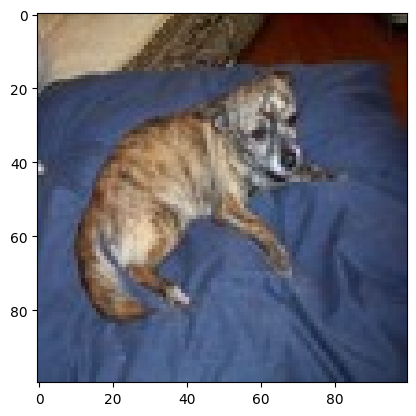

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

### Building the model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



### Compiling and Training the Model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 20, batch_size = 64)


In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
layer_outputs = [layer.output for layer in model.layers[0:7]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

import cv2
#read our live_test_draw
idx2 = random.randint(0, len(Y_test))
img_live = X_test[idx2, :].reshape(1, 100, 100, 3)
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx2, :])
img_final = (img_live.reshape(1,100,100,3,1))/255
activations = activation_model.predict(img_final)

#display kernel outputs
layer_names = []
for layer in model.layers[0:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Prediction of our Model

In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

### Evaluating our Model

In [ ]:
model.evaluate(X_test,Y_test)
model.save('cnn-opencv.h5')

### Live Demo